In [2]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil
import copy

from scipy import ndimage, interpolate, optimize

from eos import aqua_eos, fe_eos
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [29]:
orig = meos.read_MESAtable("./my_MESAformat_tables/mesa-planetblend_10z80x.data")
new = meos.read_MESAtable("./test_cleanup_mesaEOSnotebook/mesa-planetblend_10z80x.data")

# table[:,:,0] = log10Tgrid
# table[:,:,-2] = log10Qgrid
# table[:,:,-1] = log10rhogrid

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:1345: UserWarning: The following kwargs were not used by contour: 'shading'
  axes[i,j].axvline(v,color='#7FFF00')


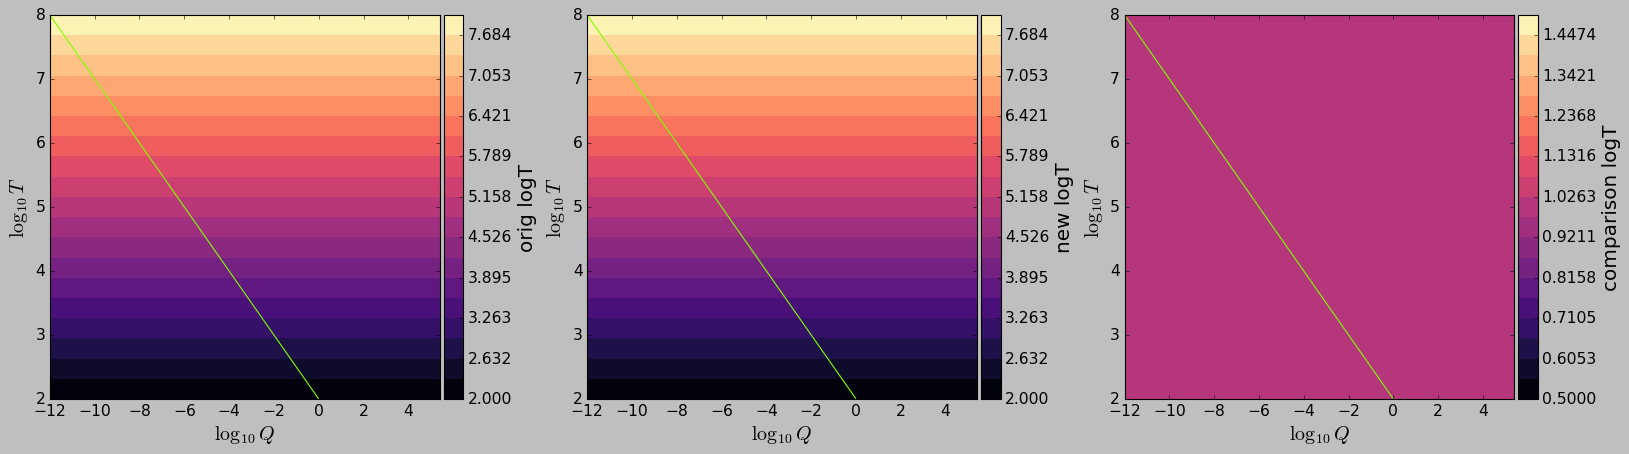

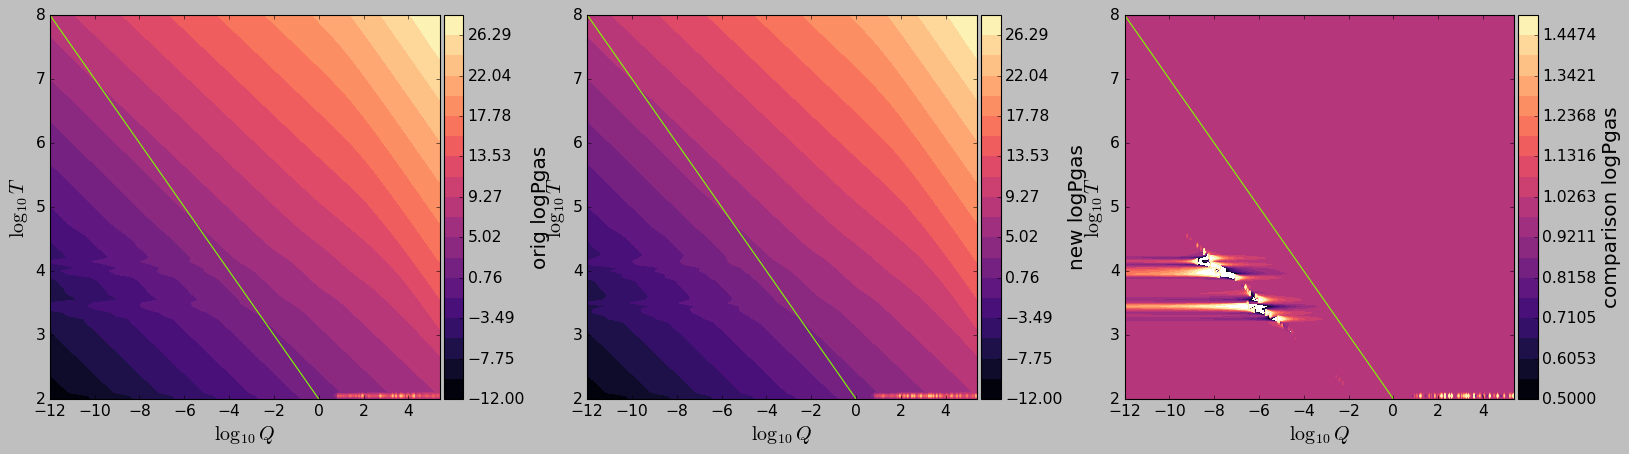

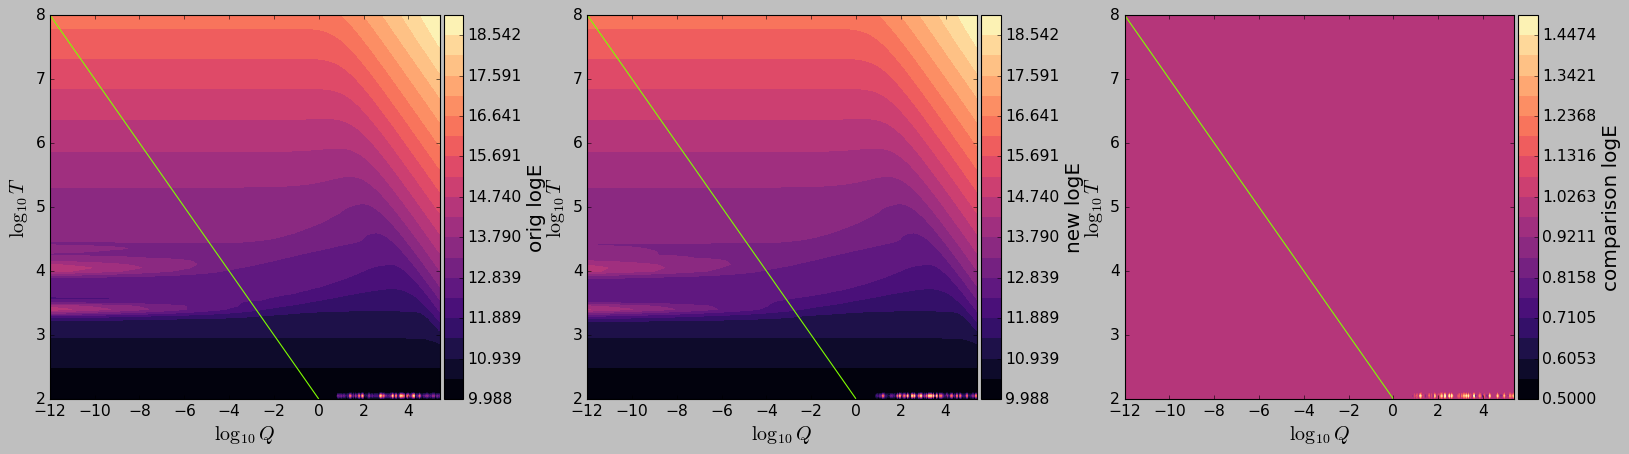

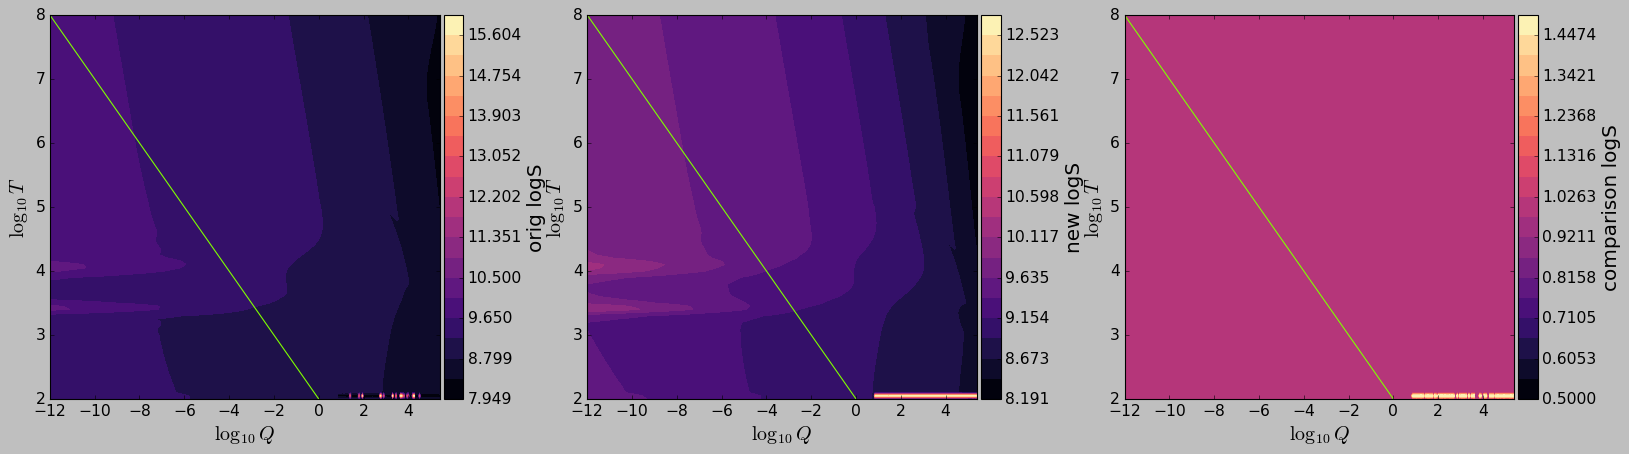

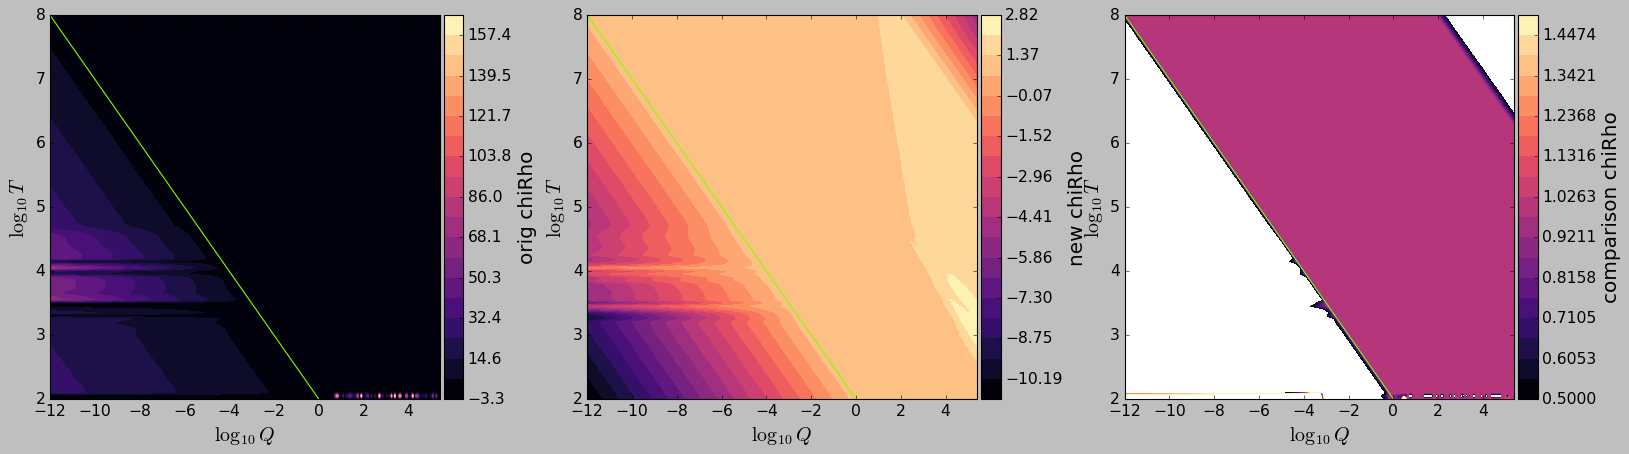

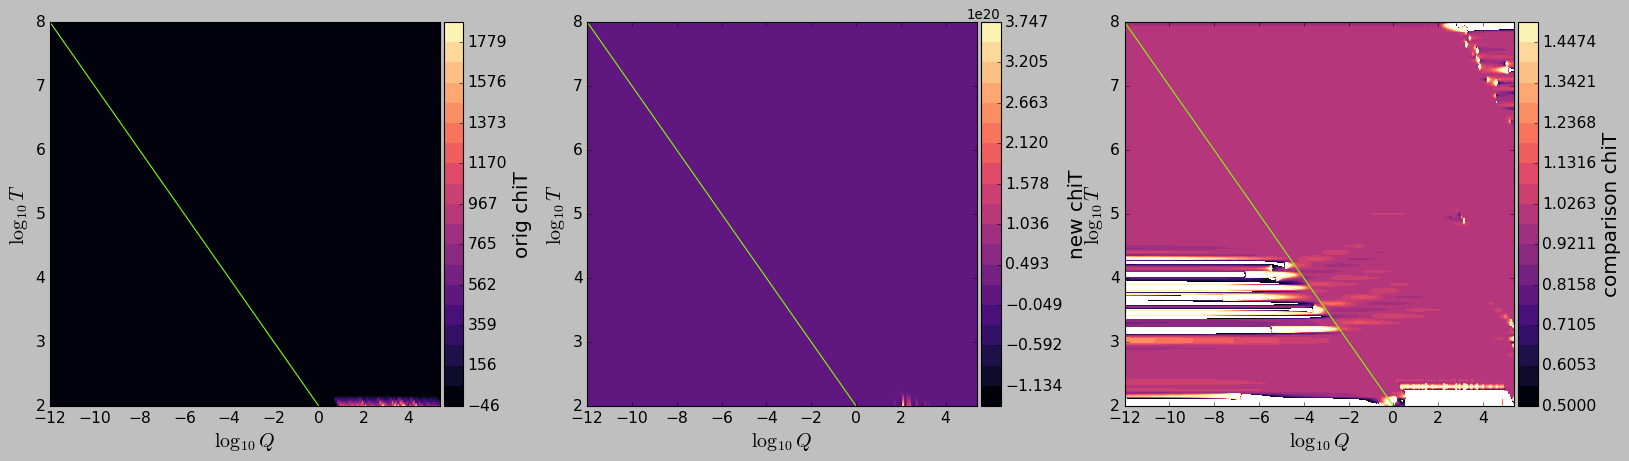

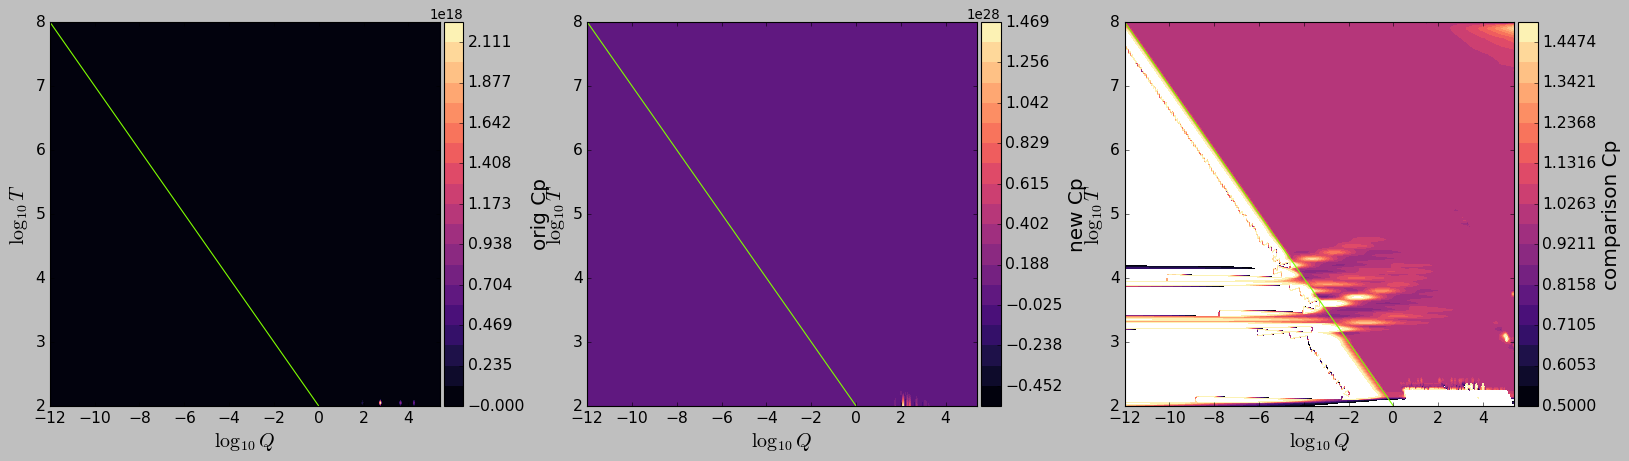

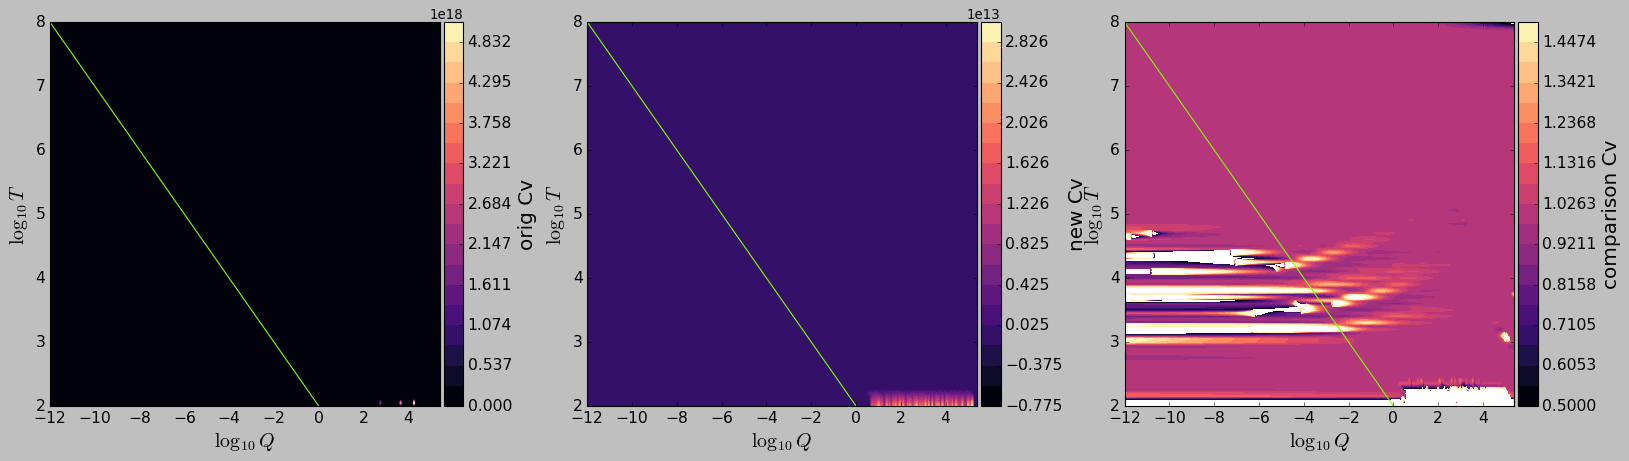

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_58731/4216446351.py:18: RuntimeWarning: divide by zero encountered in divide
  zs=[orig[:,:,i],new[:,:,i], new[:,:,i]/orig[:,:,i]],


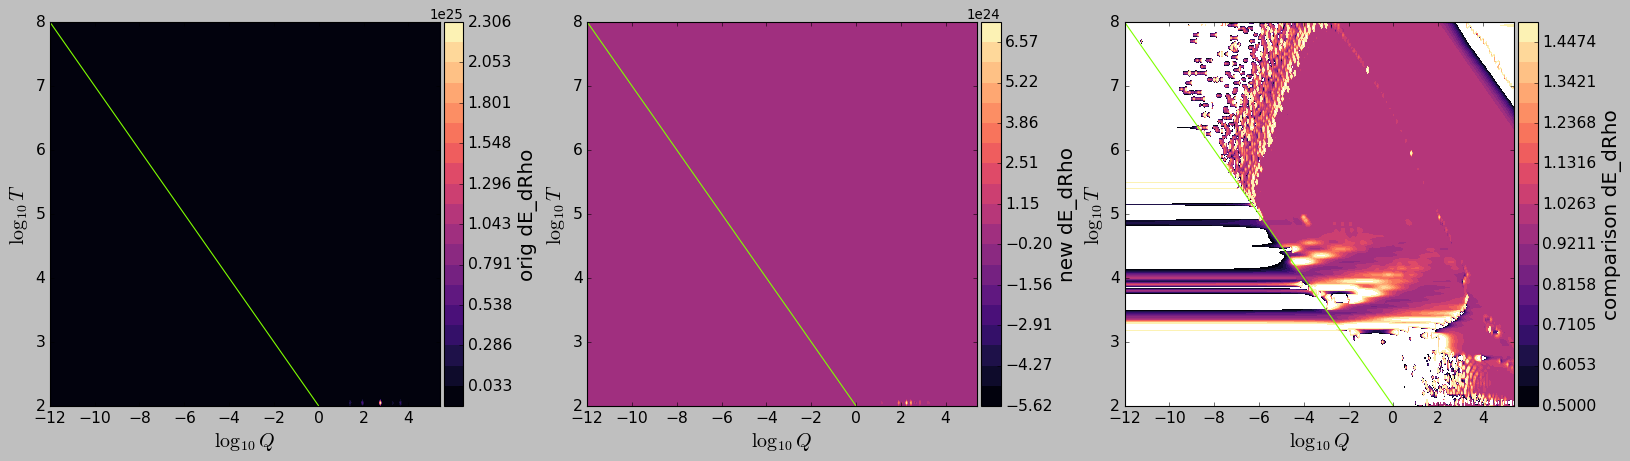

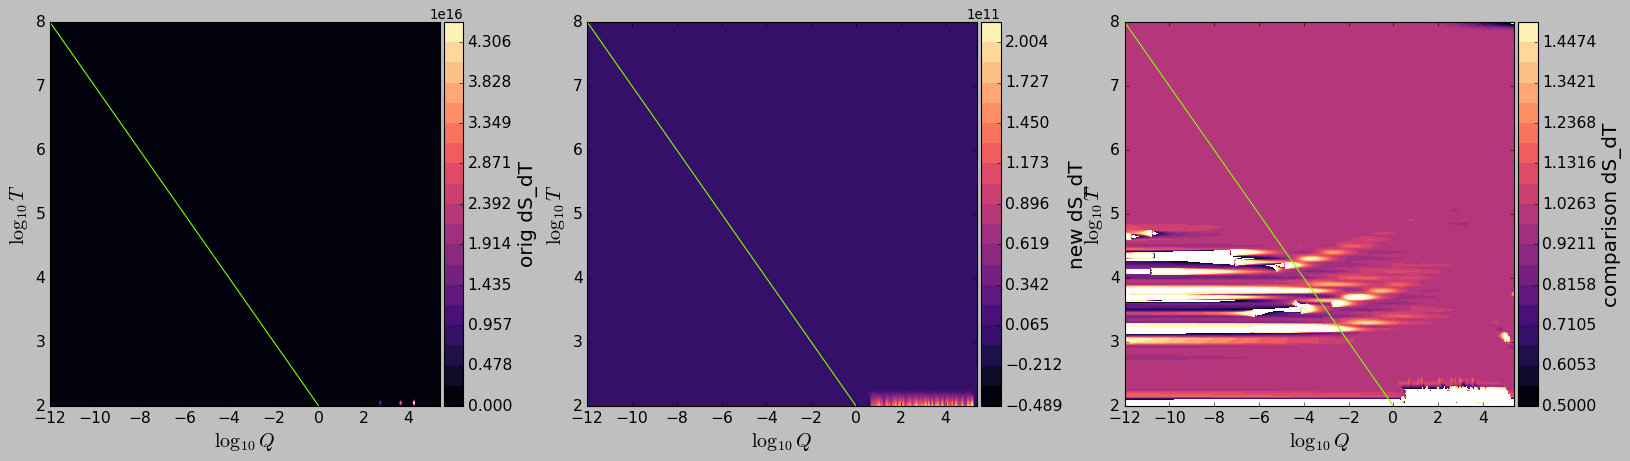

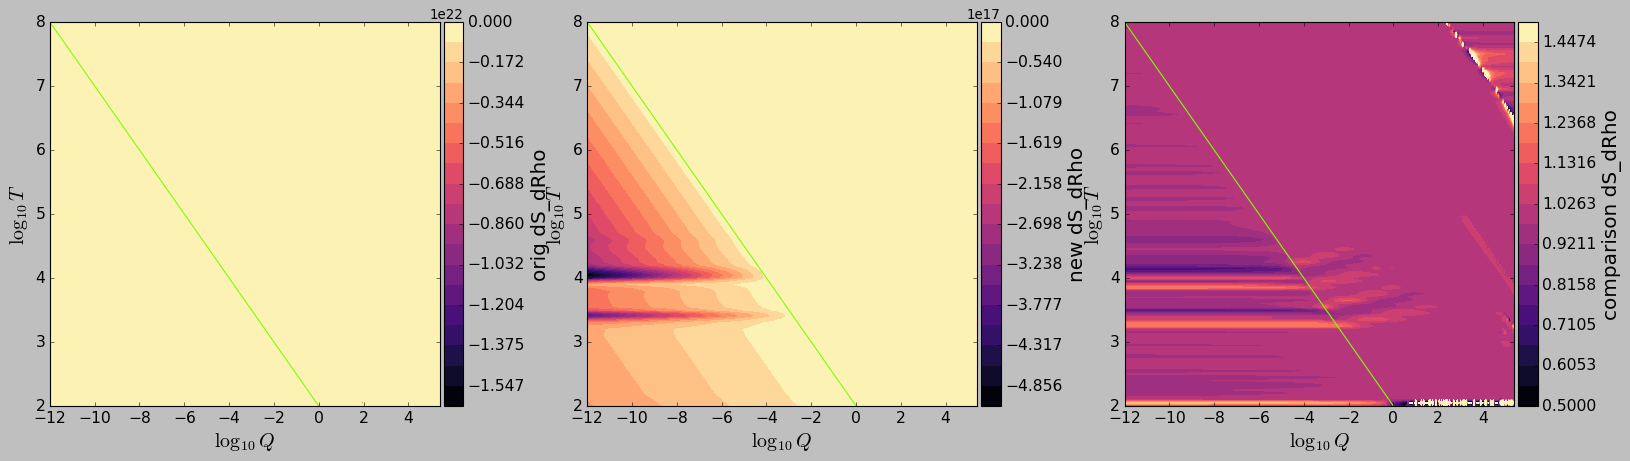

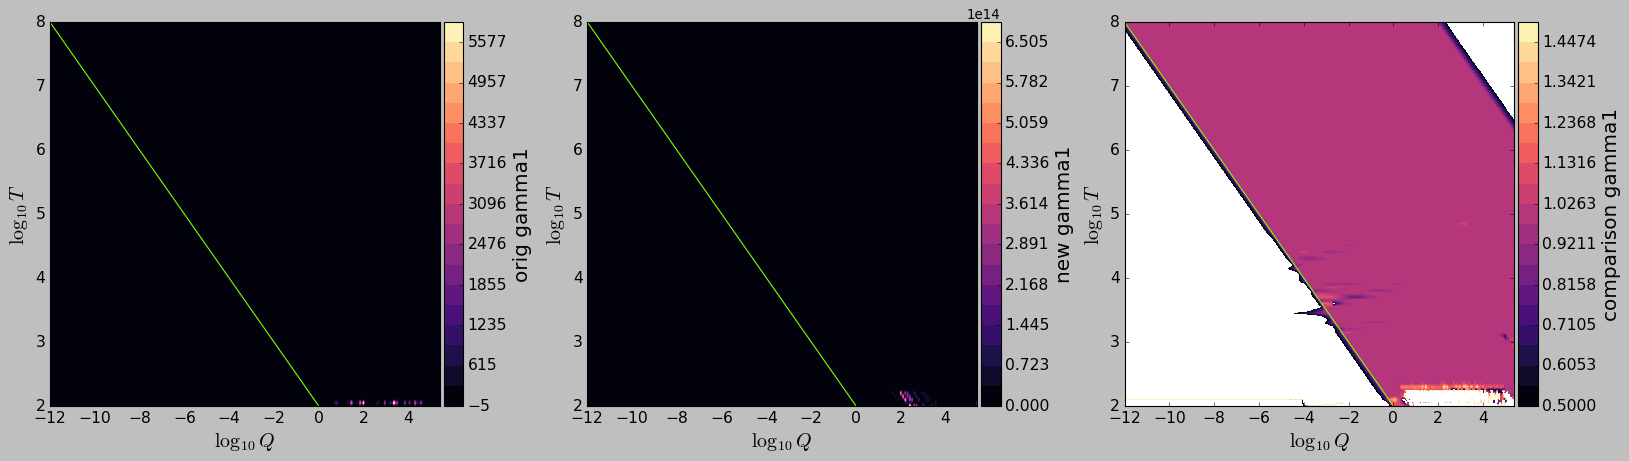

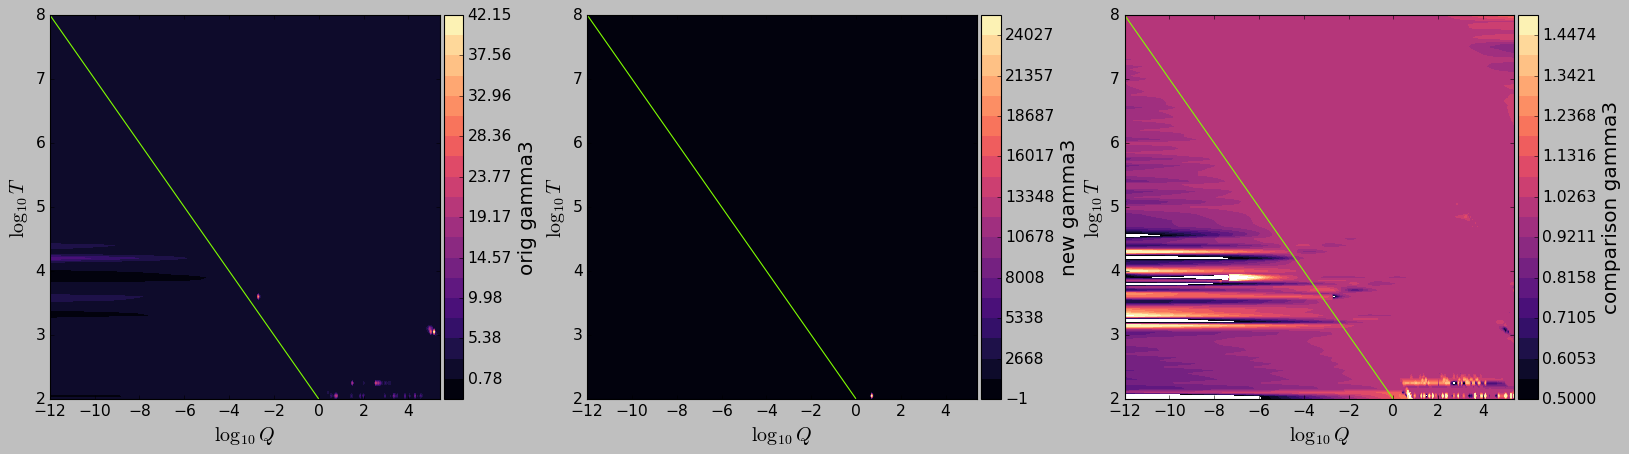

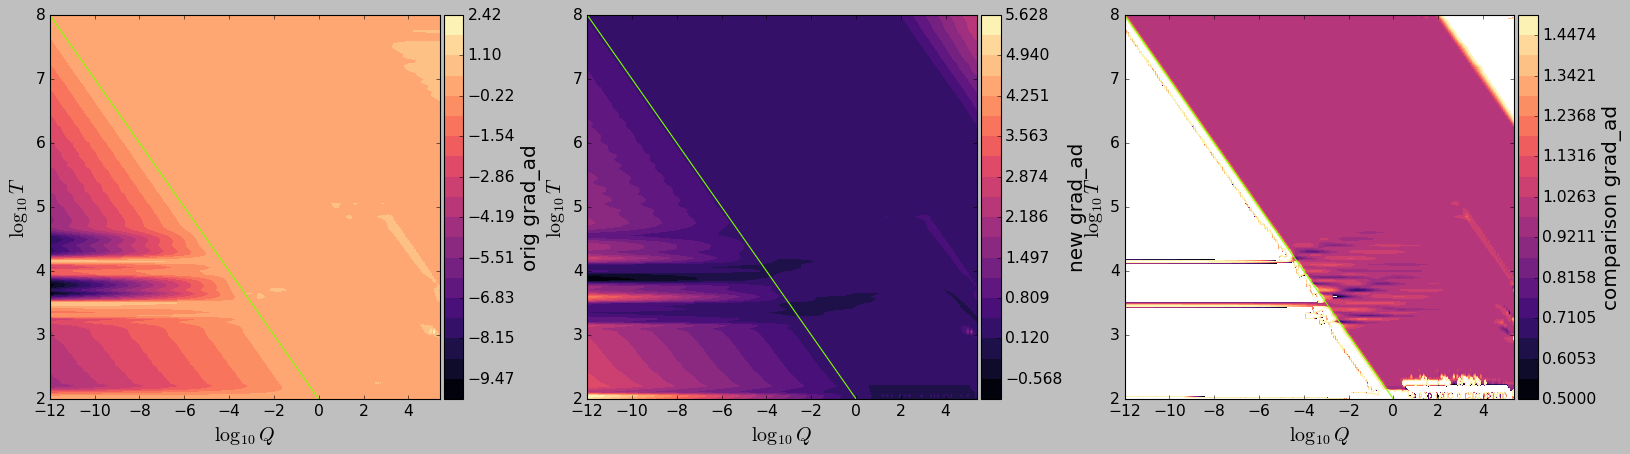

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_58731/4216446351.py:18: RuntimeWarning: invalid value encountered in divide
  zs=[orig[:,:,i],new[:,:,i], new[:,:,i]/orig[:,:,i]],


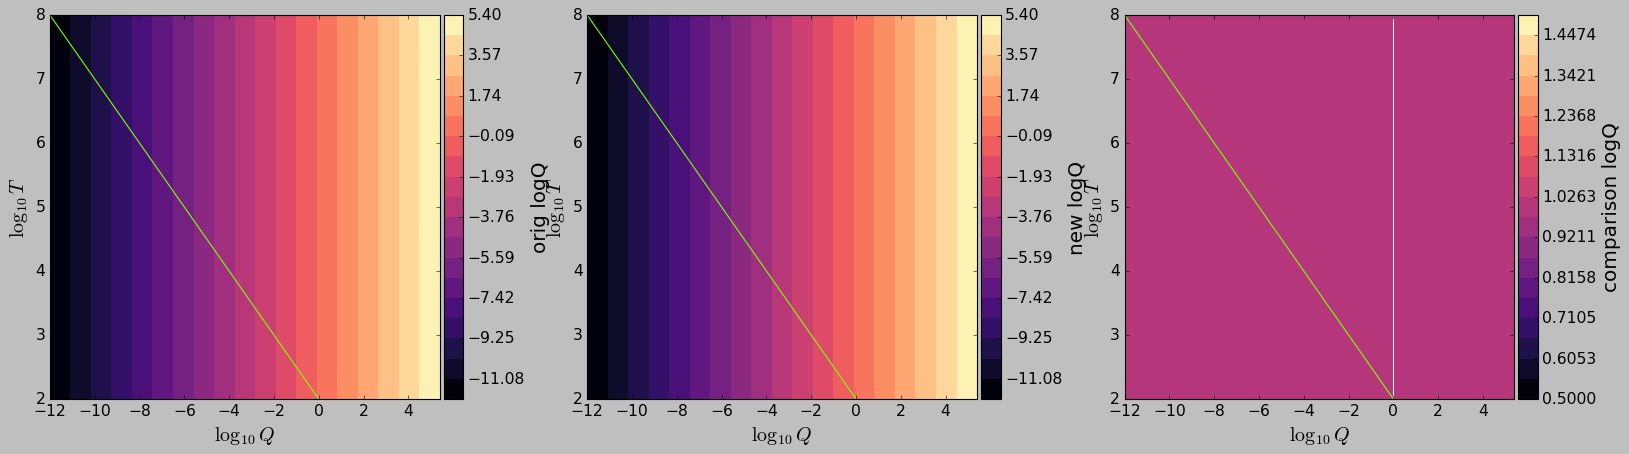

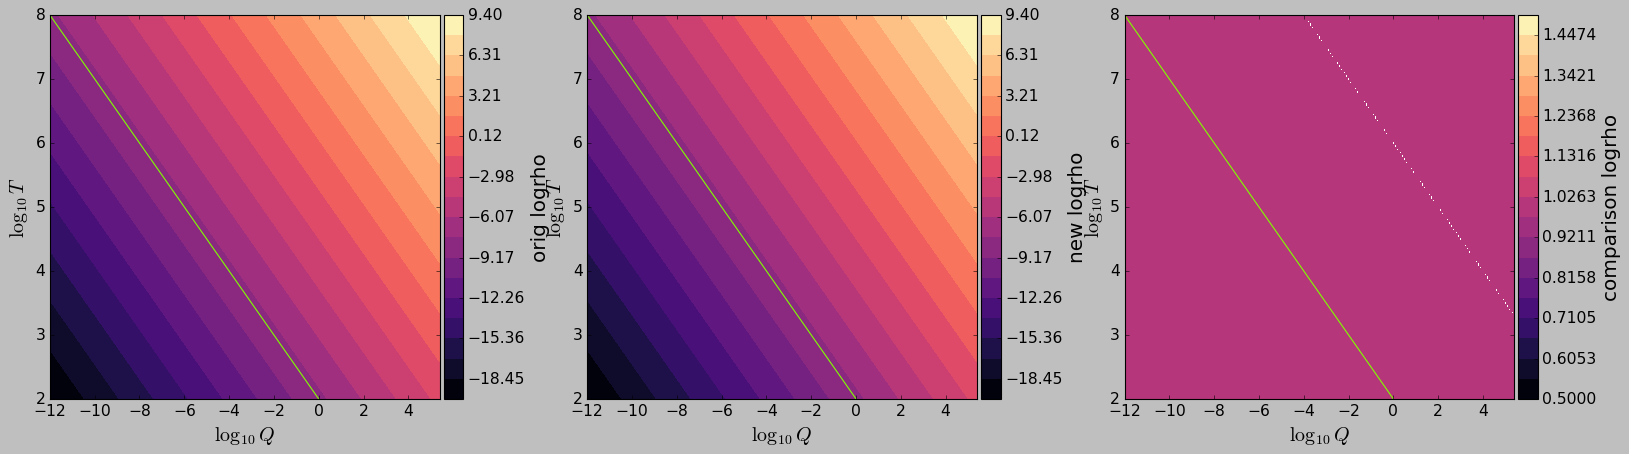

In [30]:
x = np.arange(-12,5.45,0.05)
y1 = 2 - 0.5*x
y2 = 9 - 0.5*x

labels =['logT','logPgas','logE','logS','chiRho','chiT','Cp','Cv','dE_dRho','dS_dT','dS_dRho','mu ','log_free_e','gamma1','gamma3','grad_ad','eta','logQ','logrho']

for i in range(19):
    if i != 11 and i!= 12 and i!= 16:

        orig_zmin = np.min(orig[:,:,i][np.isfinite(orig[:,:,i])])
        orig_zmax = np.max(orig[:,:,i][np.isfinite(orig[:,:,i])])

        new_zmin = np.min(new[:,:,i][np.isfinite(new[:,:,i])])
        new_zmax = np.max(new[:,:,i][np.isfinite(new[:,:,i])])
        meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                    xs=orig[:,:,-2],
                                    ys=orig[:,:,0],
                                    zs=[orig[:,:,i],new[:,:,i], new[:,:,i]/orig[:,:,i]],
                                    xlims=(-12,5.4),
                                    ylims=(2,8),
                                    zlims=[(orig_zmin,orig_zmax),(new_zmin,new_zmax),(0.5,1.5)],
                                    levels=20,
                                    xlabels=r'$\log_{10}Q$',
                                    ylabels=r'$\log_{10}T$',
                                    zlabels=['orig {0}'.format(labels[i]),'new {0}'.format(labels[i]),'comparison {0}'.format(labels[i])],
                                    cmap='magma', vlines=None, hlines=None, otherlines_x=[x], otherlines_y=[y1,y2], 
                                    species='H', plot_interpolation_lines=False, savename=None)
    
        